In [1]:
from ipywidgets import interact, FloatSlider, RadioButtons,Dropdown,SelectMultiple,FloatRangeSlider
import gc, argparse, sys, os, errno
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import h5py
import os
import scipy
import sklearn
from scipy.stats import pearsonr
from sklearn.metrics import roc_curve,roc_auc_score
import warnings
warnings.filterwarnings('ignore')
from ipywidgets import interact, FloatSlider,IntSlider, RadioButtons,Dropdown,Tab,Text
styles = ["white","dark",'whitegrid',"darkgrid"]
contexts = ['paper','talk','poster','notebook']


Populating the interactive namespace from numpy and matplotlib


/apps/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
wholeannotation = pd.read_table("wholeannotation.csv",sep=',')

In [8]:
wholeannotation['sampleuse'][wholeannotation['sampleuse']==0] = 1

In [9]:
wholeannotation.to_csv('wholeannotation.csv')

In [ ]:
np.where(wholeannotab['Disease_status'] =='HCC_after_surgery')
np.array(wholeannotab['Sample_ID'])[46]  #14 31 46  去掉BD-low-mix，507891-B，511122-A
wholeannotab['use'] =1
wholeannotab['use'][np.array([42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58,
        59, 60, 64, 65,14 ,31, 46 ])] =0

In [121]:
wholeannotab.to_csv('wholeannotation.csv')

In [127]:
annotation = pd.read_table("hcc_lulab.sample.info.txt", sep = "\t")
print (wholeannotation.shape)
wholeannotation.head()

(66, 24)


,Unnamed: 0,Unnamed: 0.1,Sample_ID,Disease_status,Sex,Age,Tumor_size(cm),Multiple_tumor,Vascular_invasion,Satellite_nonules,...,AST,ALB,PT,Stage-BCLC,RNA_mass(ng/mlplasma),Batch,spike-in,Seq-mode,DNase1,use
0,0,0,lulab_249136_B,HCC_before_surgery,M,43,2.8,No,No,0,...,279,36.6,10.1,A,27.63,7th_201803,NaN,NaN,NaN,1
1,1,1,lulab_385247_B,HCC_before_surgery,M,54,4,No,No,1,...,27,42.5,12,A,33.45,4th_201801,NaN,NaN,NaN,1
2,2,2,lulab_423976_B,HCC_before_surgery,F,60,_,No,Yes,0,...,29,18.5,15,C,32.66,3nd_201801,NaN,NaN,NaN,1
3,3,3,lulab_497411_B,HCC_before_surgery,F,70,8,No,No,0,...,45,44.7,11.3,A,28.32,2nd_201712,0,PE150,N,1
4,4,4,lulab_497497_B,HCC_before_surgery,M,44,12.3,Yes,No,0,...,63,43.8,11.2,B,34.24,1st_201711,0,PE150,N,1


In [90]:
dataarr = allmx

In [88]:
allmx.shape

(854770, 64)

In [12]:
top203 = np.array([top203[i].split('.')[0] for i in range(20)])
top203

array(['Y_RNA_ENSG00000201778', 'Y_RNA_ENSG00000201778',
       'Y_RNA_ENSG00000201778', 'miRNA_ENSG00000284565',
       'miRNA_ENSG00000284565', 'miRNA_ENSG00000284440',
       'miRNA_ENSG00000284440', 'miRNA_ENSG00000284440',
       'miRNA_ENSG00000284190', 'miRNA_ENSG00000284190',
       'miRNA_ENSG00000199179', 'miRNA_ENSG00000199179',
       'miRNA_ENSG00000199085', 'miRNA_ENSG00000199085',
       'miRNA_ENSG00000199075', 'miRNA_ENSG00000199075',
       'miRNA_ENSG00000207789', 'miRNA_ENSG00000207789',
       'miRNA_ENSG00000283450', 'miRNA_ENSG00000283450'], dtype='<U21')

In [10]:

#trim:
top201 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000283364.1', 'lncRNA_ENSG00000264066.6',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000207778.3',
       'lncRNA_ENSG00000267391.4', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000283450.1',
       'lncRNA_ENSG00000234741.7', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1'])

#no trim:
#fulllength:
top202 = np.array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199075.1', 'miRNA_ENSG00000207789.1',
       'miRNA_ENSG00000283450.1', 'miRNA_ENSG00000274705.2',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000283824.1',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000199072.3'])

#no trim:
#bin:
top203 = np.array(['Y_RNA_ENSG00000201778.1__157153548__157153578',
       'Y_RNA_ENSG00000201778.1__157153563__157153593',
       'Y_RNA_ENSG00000201778.1__157153578__157153608',
       'miRNA_ENSG00000284565.1__28861384__28861414',
       'miRNA_ENSG00000284565.1__28861399__28861429',
       'miRNA_ENSG00000284440.1__58451089__58451119',
       'miRNA_ENSG00000284440.1__58451074__58451104',
       'miRNA_ENSG00000284440.1__58451104__58451134',
       'miRNA_ENSG00000284190.1__59841281__59841311',
       'miRNA_ENSG00000284190.1__59841266__59841296',
       'miRNA_ENSG00000199179.3__62603701__62603731',
       'miRNA_ENSG00000199179.3__62603686__62603716',
       'miRNA_ENSG00000199085.3__25949934__25949964',
       'miRNA_ENSG00000199085.3__25949919__25949949',
       'miRNA_ENSG00000199075.1__37969419__37969449',
       'miRNA_ENSG00000199075.1__37969404__37969434',
       'miRNA_ENSG00000207789.1__57824639__57824669',
       'miRNA_ENSG00000207789.1__57824654__57824684',
       'miRNA_ENSG00000283450.1__41660459__41660489',
       'miRNA_ENSG00000283450.1__41660444__41660474'])

# feature selection
use after normalization

In [768]:
def get_feature(method='full'):
    if method =='full':
        featuretable = pd.read_table("05.matrix/forfeatureselectionbynorm_61sample.csv",sep=',').iloc[:,1:]
        sampleinduse = np.where(np.isin(np.array(featuretable['sampleID']),wholeannotation['Sample_ID'][np.where(wholeannotation['use']==1)[0]]
                ))[0]
        featuretable = featuretable.iloc[sampleinduse,:]
        featuresarray = np.array(featuretable.iloc[:,2:])
        featuretable['lables'][featuretable['lables'] ==2]=0
        featuresarray =np.concatenate((preprocessing.scale(featuresarray),
                               preprocessing.scale(fullfeature.iloc[top20fullindex,sampleinduse]).T,
                ),axis=1)
        return featuresarray,np.array(featuretable['lables']),np.concatenate((featuretable.columns[2:],fulltop20))
    elif method=='bin':
        pass

In [766]:
fulltop20

array(['Y_RNA_ENSG00000201778.1', 'miRNA_ENSG00000284565.1',
       'miRNA_ENSG00000284440.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000199179.3', 'miRNA_ENSG00000199075.1',
       'miRNA_ENSG00000207789.1', 'miRNA_ENSG00000283450.1',
       'miRNA_ENSG00000274705.2', 'miRNA_ENSG00000199085.3',
       'miRNA_ENSG00000199150.3', 'miRNA_ENSG00000199161.1',
       'miRNA_ENSG00000283935.1', 'miRNA_ENSG00000284520.1',
       'miRNA_ENSG00000199153.1', 'miRNA_ENSG00000208012.1',
       'miRNA_ENSG00000283733.1', 'miRNA_ENSG00000199072.3',
       'miRNA_ENSG00000199121.4', 'miRNA_ENSG00000207547.1'], dtype='<U23')

In [11]:
def get_data(allsample=True):
    if allsample:
        return pd.read_table("05.matrix/forfeatureselectionbynorm_61sample.csv",sep=',').iloc[:,1:]
    else:
        return pd.read_table("05.matrix/forfeatureselectionbyruvs20_allsample.csv",sep=',').iloc[:,1:]
       

wholeannotation['Sample_ID'][np.where(wholeannotation['use']==1)[0]]

In [724]:
featuretable = get_data(allsample=True)
featuretable.head()

,sampleID,lables,miRNA_ENSG00000278267.1,miRNA_ENSG00000273874.1,miRNA_ENSG00000278791.1,miRNA_ENSG00000207730.3,miRNA_ENSG00000207607.3,miRNA_ENSG00000198976.1,miRNA_ENSG00000278073.1,miRNA_ENSG00000283712.1,...,mRNA_ENSG00000198712.1,mRNA_ENSG00000228253.1,mRNA_ENSG00000198899.2,mRNA_ENSG00000198938.2,mRNA_ENSG00000198840.2,mRNA_ENSG00000212907.2,mRNA_ENSG00000198886.2,mRNA_ENSG00000198786.2,mRNA_ENSG00000198695.2,mRNA_ENSG00000198727.2
0,lulab_249136_B,1,1.931669,0.954807,2.919959,12.679759,12.630014,11.670977,1.267524,0.954807,...,7.868536,4.435832,5.524797,6.657228,5.624204,5.539424,7.279413,7.355779,7.212534,6.501592
1,lulab_385247_B,1,5.571249,5.325478,4.294132,10.357258,10.167108,9.128125,3.605377,3.078498,...,8.223489,5.109070,6.237897,6.995539,5.731493,5.571249,7.192028,7.576728,6.340899,6.743146
2,lulab_423976_B,1,1.331789,1.819086,2.921112,9.974933,9.661134,8.933735,2.182694,0.590449,...,4.144748,0.590449,3.101940,4.015377,4.205328,2.598639,4.570292,4.539250,4.898487,4.263466
3,lulab_497411_B,1,2.452738,3.162652,2.800342,10.716760,10.821939,9.717191,3.080243,2.315384,...,5.014435,0.995913,4.451620,4.079761,3.758483,3.451993,5.746855,5.824849,5.576949,3.946541
4,lulab_497497_B,1,4.054432,4.412765,4.863312,9.789241,10.214022,8.922053,5.143779,3.374222,...,9.270997,7.809269,7.592958,7.063171,8.954202,7.848895,8.479888,9.560742,8.179318,7.906365


#### 43个需要的sample

In [725]:
sampleinduse = np.where(np.isin(np.array(featuretable['sampleID']),
    wholeannotation['Sample_ID'][np.where(wholeannotation['use']==1)[0]]
            ))[0]
featuretable = featuretable.iloc[sampleinduse,:]
featuretable.head()
featuresarray = np.array(featuretable.iloc[:,2:])
featuretable['lables'][featuretable['lables'] ==2]=0

In [718]:
featuretable.shape

(43, 23829)

In [621]:
np.array(featuretable['lables']).reshape(1,-1).shape

(1, 43)

### 取top20 43个sample的

In [622]:
fullfeature.iloc[top20fullindex,sampleinduse].shape

(20, 43)

将featuresarray和top20 全部normalize z score 拼起来

In [392]:
print (preprocessing.scale(fullfeature.iloc[top20fullindex,sampleinduse]).shape)
print (preprocessing.scale(featuresarray).shape)
from  sklearn import preprocessing
featuresarray =np.concatenate((preprocessing.scale(featuresarray),
                               preprocessing.scale(fullfeature.iloc[top20fullindex,sampleinduse]).T,
                ),axis=1)
featuresarray.shape

(20, 43)
(43, 23827)


(43, 23847)

#### 直接feature selection full fit挑gene！

#### 使用lasso+两种方法中的一种挑feature

In [544]:
featuresarray.shape

(43, 23827)

In [608]:
def feature_select(X,y,geneid,method):
    '''
    geneid  
    X y featuresarray, np.array(featuretable['lables'])
    X y mxlogged, np.array(featuretable['lables'])
    for processed data: featuretable.columns[2:]
    for raw data:  rawindex
    '''
    clf = linear_model.Lasso(alpha=0.0001)
    clf.fit(X, y)
    selectfeatureind = np.where(clf.coef_>=0.00001)[0]
    if method =='rfr':
        rfr = RandomForestClassifier(max_depth=2, random_state=0)
        rfr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        selectfeatureind_ =selectfeatureind[np.argsort(-rfr.feature_importances_)[:np.where(rfr.feature_importances_!=0)[0].shape[0]]]

        ttttesttab =pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_].reshape(-1,1),
                                    rfr.feature_importances_[np.argsort(-rfr.feature_importances_)
                                 [:np.where(rfr.feature_importances_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                    columns=['ID','importance'])
        countlist_ = []
        for i in range(20):
            countlist_.append(ttttesttab.iloc[i,0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(8,4))
        ax.plot(np.array(ttttesttab.iloc[:,1]))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0]))
        ax.set_title('feature importance: '+method)
    if method =='lgr':
        lgr = LogisticRegression()
        lgr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        lgr.coef_ = lgr.coef_.ravel()
        selectfeatureind_ =selectfeatureind[np.argsort(-np.abs(lgr.coef_))[:np.where(lgr.coef_!=0)[0].shape[0]]]

        ttttesttab =  pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_-1].reshape(-1,1),
                                lgr.coef_[np.argsort(-np.abs(lgr.coef_))
                             [:np.where(lgr.coef_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                columns=['ID','importance'])
        countlist_ = []
        for i in range(100):
            countlist_.append(ttttesttab.iloc[i,0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(10,5))
        ax.plot(np.abs(np.array(ttttesttab.iloc[:,1])))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0],5))
        ax.set_title('feature importance: '+method)

In [492]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=0.0001)
X, y = featuresarray, np.array(featuretable['lables'])
clf.fit(X, y)
featuresarray[:,np.where(clf.coef_!=0)[0]].shape
#np.unique(clf.coef_).shape
selectfeatureind = np.where(clf.coef_>=0.00001)[0]

In [503]:
testtab = pd.read_table('/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/06.DE/edgeR.result/HCC_HD+HBV.edgeR.result')
np.array([testtab.iloc[:,0][i].split('_')[0]
        for i in range(testtab.shape[0])]
        )

array(['mRNA', 'mRNA', 'mRNA', ..., 'mRNA', 'mRNA', 'mRNA'], dtype='<U6')

,0,1,2,3,4
0,miRNA_ENSG00000283751.1: 0.3208,snoRNA_ENSG00000238835.1: 0.3063,miRNA_ENSG00000264402.1: -0.3006,miRNA_ENSG00000207580.1: 0.2895,miRNA_ENSG00000207957.1: 0.2884
1,piRNA_piR.hsa.29514_4: 0.2766,miRNA_ENSG00000264539.1: 0.2339,mRNA_ENSG00000114120.11: 0.2282,piRNA_piR.hsa.10007: 0.2262,mRNA_ENSG00000075223.13: 0.2059
2,miRNA_ENSG00000265658.6_PAR_Y: 0.202,lncRNA_ENSG00000280043.1: 0.2,miRNA_ENSG00000275455.1: -0.1989,mRNA_ENSG00000170017.12: 0.1885,miRNA_ENSG00000221017.1: 0.1863
3,Y_RNA_ENSG00000251799.1: 0.1822,miRNA_ENSG00000207869.1: 0.1803,snoRNA_ENSG00000206656.1: 0.1623,Y_RNA_ENSG00000199895.1: -0.1551,snRNA_ENSG00000200204.1: 0.1544
4,miRNA_ENSG00000275207.1: 0.1543,miRNA_ENSG00000211491.2: -0.1523,mRNA_ENSG00000134215.15: 0.149,miRNA_ENSG00000221808.1: 0.146,mRNA_ENSG00000163810.11: 0.1452
5,lncRNA_ENSG00000232878.3: 0.1436,lncRNA_ENSG00000254990.5: 0.1411,lncRNA_ENSG00000261898.2: -0.1407,mRNA_ENSG00000143772.9: 0.1317,lncRNA_ENSG00000231421.7: -0.1279
6,miRNA_ENSG00000284203.1: 0.1226,miRNA_ENSG00000207604.3: -0.122,snoRNA_ENSG00000221300.1: 0.1177,miRNA_ENSG00000265986.1: -0.1171,miRNA_ENSG00000263468.1: -0.1168
7,miRNA_ENSG00000265699.1: -0.1131,mRNA_ENSG00000048544.5: 0.1106,miRNA_ENSG00000211520.2: -0.1092,miRNA_ENSG00000278524.1: -0.1067,mRNA_ENSG00000121236.20: 0.1061
8,miRNA_ENSG00000284421.1: 0.1055,mRNA_ENSG00000115446.11: 0.1038,mRNA_ENSG00000136546.13: 0.1025,lncRNA_ENSG00000235531.9: -0.101,lncRNA_ENSG00000278965.1: 0.1001
9,miRNA_ENSG00000207645.2: 0.0998,miRNA_ENSG00000265507.1: -0.0976,lncRNA_ENSG00000231689.2: 0.0972,mRNA_ENSG00000069275.12: -0.0969,piRNA_piR.hsa.10453_4: 0.0924


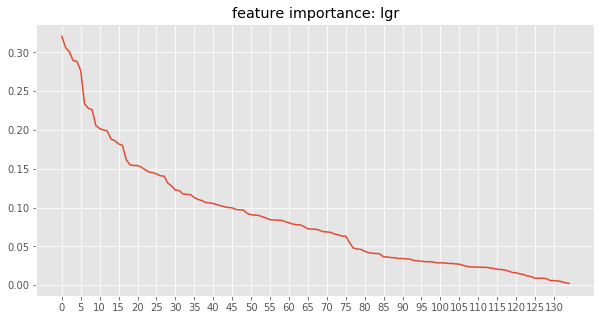

In [604]:
feature_select(featuresarray,np.array(featuretable['lables']),featuretable.columns[2:],\
               'lgr')

,0,1,2,3,4
0,miRNA_ENSG00000207925.1: 0.1211,lncRNA_ENSG00000249614.1: 0.0962,mRNA_ENSG00000101438.3: 0.0836,tRNA_32724: 0.0729,piRNA_piR-hsa-28186_3: 0.0725
1,miRNA_ENSG00000265815.1: 0.0663,miRNA_ENSG00000283734.1: 0.0535,tRNA_28525: 0.0535,Y_RNA_ENSG00000201676.1: 0.0532,snRNA_ENSG00000251994.1: 0.0514
2,miRNA_ENSG00000221025.1: 0.0465,Y_RNA_ENSG00000275930.1: 0.0454,miRNA_ENSG00000284035.1: 0.0346,piRNA_piR-hsa-1848_2: 0.0337,mRNA_ENSG00000114423.18: 0.0292
3,mRNA_ENSG00000144908.13: 0.0286,snRNA_ENSG00000252244.1: 0.0271,miRNA_ENSG00000284485.1: 0.0215,miRNA_ENSG00000266533.1: 0.006,miRNA_ENSG00000216179.1: 0.0032


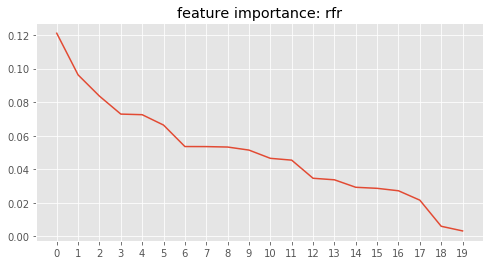

In [601]:
feature_select(mxlogged.T,np.array(featuretable['lables']),rawindex,\
               'rfr')

,0,1,2,3,4
0,lncRNA_ENSG00000250920.1: 0.38,piRNA_piR-hsa-3985: 0.3616,Y_RNA_ENSG00000199676.1: 0.3513,miRNA_ENSG00000199015.4: 0.3325,snRNA_ENSG00000199735.1: 0.3296
1,miRNA_ENSG00000221788.1: -0.3247,miRNA_ENSG00000212036.3: -0.3134,Y_RNA_ENSG00000251799.1: 0.2981,miRNA_ENSG00000199121.4: -0.2907,miRNA_ENSG00000266188.1: -0.2892
2,mRNA_ENSG00000114120.11: 0.2832,miRNA_ENSG00000284421.1: 0.2677,mRNA_ENSG00000170471.14: 0.2655,mRNA_ENSG00000038295.7: 0.2634,miRNA_ENSG00000207799.1: 0.2588
3,miRNA_ENSG00000266144.1: -0.2512,snoRNA_ENSG00000206656.1: 0.2497,Y_RNA_ENSG00000199870.1: 0.2336,snoRNA_ENSG00000206597.1: -0.2327,mRNA_ENSG00000183831.6: 0.2326
4,piRNA_piR-hsa-28467: 0.2205,mRNA_ENSG00000170017.12: 0.2184,miRNA_ENSG00000283604.1: -0.2084,piRNA_piR-hsa-22272_11: 0.2021,miRNA_ENSG00000221808.1: 0.2019
5,snRNA_ENSG00000200204.1: 0.197,snoRNA_ENSG00000199960.1: 0.1969,miRNA_ENSG00000283793.1: 0.1895,miRNA_ENSG00000211581.1: -0.1882,piRNA_piR-hsa-28527_3: 0.1858
6,mRNA_ENSG00000113387.11: 0.1834,miRNA_ENSG00000199075.1: 0.1815,mRNA_ENSG00000010327.10: 0.1787,lncRNA_ENSG00000279862.1: 0.1758,miRNA_ENSG00000265606.1: -0.1711
7,mRNA_ENSG00000196505.10: 0.1623,piRNA_piR-hsa-28527_2: 0.1538,mRNA_ENSG00000166197.16: 0.1537,miRNA_ENSG00000264720.3: 0.1501,miRNA_ENSG00000207645.2: 0.1496
8,miRNA_ENSG00000266109.1: 0.1464,mRNA_ENSG00000155926.13: -0.1403,miRNA_ENSG00000278791.1: -0.1385,miRNA_ENSG00000221585.1: 0.1381,mRNA_ENSG00000153814.11: 0.1315
9,miRNA_ENSG00000207960.1: 0.1267,miRNA_ENSG00000264881.1: 0.1249,mRNA_ENSG00000082014.16: 0.1241,Y_RNA_ENSG00000206817.1: 0.1185,snoRNA_ENSG00000201679.1: 0.1176


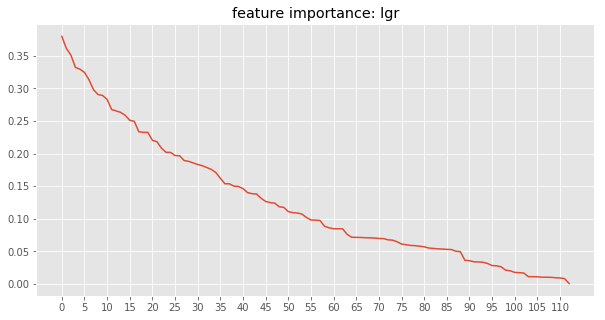

In [605]:
feature_select(mxlogged.T,np.array(featuretable['lables']),rawindex,\
               'lgr')

,0,1,2,3,4
0,miRNA_ENSG00000284195.1: 0.0735,piRNA_piR-hsa-28527: 0.0665,miRNA_ENSG00000199015.4: 0.0632,miRNA_ENSG00000284447.1: 0.0611,snRNA_ENSG00000202538.1: 0.0568
1,miRNA_ENSG00000284416.1: 0.0546,mRNA_ENSG00000038427.15: 0.0529,miRNA_ENSG00000284542.1: 0.0518,miRNA_ENSG00000266071.1: 0.0509,miRNA_ENSG00000221333.1: 0.0491
2,tRNA_12969: 0.0482,miRNA_ENSG00000267195.1: 0.0471,miRNA_ENSG00000263575.1: 0.0463,tRNA_24597: 0.0396,miRNA_ENSG00000265160.1: 0.0389
3,miRNA_ENSG00000284329.1: 0.0382,miRNA_ENSG00000221081.1: 0.0368,miRNA_ENSG00000264226.1: 0.0308,miRNA_ENSG00000264712.3: 0.0265,miRNA_ENSG00000215991.1: 0.0228


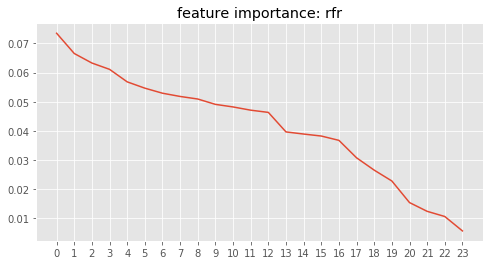

In [609]:
feature_select(rawmx.T,np.array(featuretable['lables']),rawindex,\
               'rfr')

,0,1,2,3,4
0,piRNA_piR-hsa-26492: 0.0254,miRNA_ENSG00000274056.1: -0.0194,miRNA_ENSG00000283598.1: -0.018,miRNA_ENSG00000266006.1: 0.0162,miRNA_ENSG00000207739.1: 0.0154
1,miRNA_ENSG00000221120.1: -0.0153,piRNA_piR-hsa-23387_86653: -0.0143,miRNA_ENSG00000207924.3: -0.0139,miRNA_ENSG00000265956.1: -0.013,miRNA_ENSG00000207811.3: 0.0126
2,Y_RNA_ENSG00000252761.1: 0.0112,miRNA_ENSG00000265355.1: -0.0102,miRNA_ENSG00000263892.3: -0.0098,miRNA_ENSG00000207633.3: 0.0097,mRNA_ENSG00000115966.16: 0.0096
3,miRNA_ENSG00000264803.1: -0.0094,Y_RNA_ENSG00000199290.1: -0.0091,miRNA_ENSG00000283604.1: 0.0089,piRNA_piR-hsa-2621_10: 0.0088,miRNA_ENSG00000264857.1: 0.0083
4,lncRNA_ENSG00000226759.7: 0.0082,miRNA_ENSG00000278281.1: 0.0079,miRNA_ENSG00000207741.1: -0.0075,miRNA_ENSG00000207797.1: 0.0074,miRNA_ENSG00000207954.1: -0.0072
5,Y_RNA_ENSG00000252047.1: -0.007,miRNA_ENSG00000277138.1: 0.0067,miRNA_ENSG00000283805.1: -0.0066,miRNA_ENSG00000283588.1: -0.0065,miRNA_ENSG00000284525.1: -0.0065
6,piRNA_piR-hsa-1361: 0.0065,miRNA_ENSG00000263793.1: -0.0064,miRNA_ENSG00000265470.1: 0.0061,piRNA_piR-hsa-28331: -0.0061,mRNA_ENSG00000137100.15: 0.006
7,miRNA_ENSG00000207976.1: 0.0058,Y_RNA_ENSG00000200855.1: -0.0058,miRNA_ENSG00000265539.1: 0.0055,miRNA_ENSG00000207776.1: -0.0053,piRNA_piR-hsa-8715: -0.0053
8,miRNA_ENSG00000272458.1: -0.0052,Y_RNA_ENSG00000238926.1: -0.0051,miRNA_ENSG00000263831.1: -0.0051,miRNA_ENSG00000221808.1: 0.005,miRNA_ENSG00000284082.1: 0.005
9,miRNA_ENSG00000202560.4: -0.0048,miRNA_ENSG00000266203.1: -0.0045,miRNA_ENSG00000221586.1: -0.0044,miRNA_ENSG00000264607.1: -0.0044,miRNA_ENSG00000211580.1: 0.0044


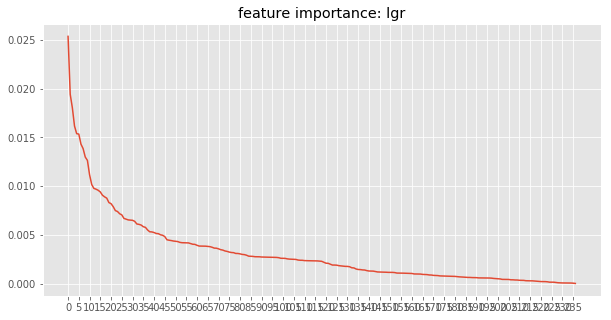

In [610]:
feature_select(rawmx.T,np.array(featuretable['lables']),rawindex,\
               'lgr')

In [ ]:
rfr = RandomForestClassifier(max_depth=2, random_state=0)
rfr.fit(featuresarray[:,np.where(clf.coef_>=0.00001)[0]], y)
selectfeatureind_ =selectfeatureind[np.argsort(-rfr.feature_importances_)[:np.where(rfr.feature_importances_!=0)[0].shape[0]]]

rfrfeature = pd.DataFrame(np.concatenate((np.array(featuretable.columns[2:])[selectfeatureind_].reshape(-1,1),
                            rfr.feature_importances_[np.argsort(-rfr.feature_importances_)
                         [:np.where(rfr.feature_importances_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
            columns=['ID','importance'])
rfrfeature

In [464]:
np.where(np.array([featuretable.columns[i].split('_')[0] for i in 
                          range(featuretable.columns.shape[0])])=='mRNA')[0]

array([ 9331,  9332,  9333, ..., 23826, 23827, 23828])

In [ ]:
lgr = LogisticRegression()
lgr.fit(featuresarray[:,np.where(clf.coef_>=0.00001)[0]], y)
lgr.coef_ = lgr.coef_.ravel()
selectfeatureind_ =selectfeatureind[np.argsort(-np.abs(lgr.coef_))[:np.where(lgr.coef_!=0)[0].shape[0]]]

lgrfeature = pd.DataFrame(np.concatenate((np.array(featuretable.columns[2:])[selectfeatureind_-1].reshape(-1,1),
                            lgr.coef_[np.argsort(-np.abs(lgr.coef_))
                         [:np.where(lgr.coef_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
            columns=['ID','importance'])

np.array(lgrfeature)[:,0]

In [471]:
np.intersect1d(np.array(lgrfeature)[:,0],np.array(rfrfeature)[:,0])

array(['miRNA_ENSG00000207869.1', 'miRNA_ENSG00000207957.1'], dtype=object)

In [472]:
np.intersect1d(np.array(rfrfeature)[:,0],sevenmirna)

array([], dtype=object)

In [473]:
np.intersect1d(np.array(lgrfeature)[:,0],sevenmirna)

array([], dtype=object)

In [474]:
np.intersect1d(np.array(lgrfeature)[:,0],fulltop20)

array([], dtype=object)

In [475]:
np.intersect1d(np.array(rfrfeature)[:,0],fulltop20)

array([], dtype=object)

In [479]:
np.intersect1d(sevenmirna,fulltop20)

array(['miRNA_ENSG00000199075.1', 'miRNA_ENSG00000284190.1',
       'miRNA_ENSG00000284440.1'], dtype='<U23')

In [ ]:
np.concatenate

clf.coef_[np.argsort(-np.abs(clf.coef_))[:20]]

In [ ]:
### 用select from model的方法，可以用很多模型来选feature

#### 用raw counts 取完log 用lasso 挑看看能不能重现出mRNA

In [527]:
np.sum(wholeannotation['use'])

43

In [541]:
tmpmx = np.array(wholemx)[np.sum(np.array(wholemx),axis=1) !=0]
rawmx = tmpmx[np.sum(tmpmx >=2,axis=1) >=10][:,np.where(np.array(wholeannotation['use'])[:64]==1)[0]]

In [542]:
mxlogged = np.ma.log(rawmx).filled(0)[:,]

In [543]:
mxlogged.shape

(24678, 43)

array(['miRNA_ENSG00000278267.1', 'miRNA_ENSG00000284332.1',
       'miRNA_ENSG00000273874.1', ..., 'mRNA_ENSG00000198786.2',
       'mRNA_ENSG00000198695.2', 'mRNA_ENSG00000198727.2'], dtype=object)

In [551]:
tmpindex = np.array(wholemx.index)[np.sum(np.array(wholemx),axis=1) !=0]
rawindex = tmpindex[np.sum(tmpmx >=2,axis=1) >=10]

# machine learning

In [75]:
featuresarray[:,np.where(clf.coef_!=0)[0]].shape

(43, 16)

In [91]:
featuresarray

array([[-0.31737723, -0.26486367, -0.25902847, ..., -0.33532844,
        -0.2865213 , -0.23352425],
       [-0.38516186, -0.32843977, -0.1410618 , ..., -0.21508161,
        -0.81499401, -0.08892471],
       [-0.42182427, -0.41555138, -0.37393438, ..., -1.86816845,
        -1.68952981, -1.57331518],
       ...,
       [-0.22330364, -0.10468306, -0.19675554, ..., -0.2100475 ,
        -0.22588322, -0.41234736],
       [-0.42997554, -0.45172899, -0.33909519, ...,  3.148995  ,
         2.93839597,  3.89954206],
       [-0.36447041, -0.08009357, -0.30822741, ..., -0.0276322 ,
        -0.16312156,  0.04975044]])

In [ ]:
clf.coef_!=0

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve, auc
from sklearn import datasets
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.preprocessing import label_binarize
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

In [77]:
rfr = RandomForestClassifier(max_depth=2, random_state=0)
rfr.fit(featuresarray[:,np.where(clf.coef_!=0)[0]], y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [257]:
def make_cv(splitnums,wholenum):
    cvind = {}
    wholeind = np.arange(0,wholenum)
    singlenum = int(wholenum/splitnums)
    np.random.seed(10)
    np.random.shuffle(wholeind)
    for i in range(splitnums-1):
        cvind[i] = wholeind[i*singlenum:(i+1)*singlenum]
    cvind[splitnums-1] = wholeind[(splitnums-1)*singlenum:]
    trainind,testind = {},{}
    for i in range(splitnums):
        trainind[i] = np.setdiff1d(wholeind,cvind[i])
        testind[i] = cvind[i]
    return trainind,testind

In [258]:
make_cv(3,43)

({0: array([ 0,  1,  4,  5,  8,  9, 10, 11, 13, 14, 15, 16, 19, 22, 23, 25, 26,
         28, 29, 30, 34, 35, 36, 37, 38, 39, 40, 41, 42]),
  1: array([ 0,  2,  3,  4,  6,  7,  8,  9, 10, 12, 15, 17, 18, 20, 21, 22, 24,
         25, 27, 28, 29, 31, 32, 33, 34, 36, 39, 41, 42]),
  2: array([ 1,  2,  3,  5,  6,  7, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23,
         24, 26, 27, 30, 31, 32, 33, 35, 37, 38, 40])},
 {0: array([31, 21, 27,  7, 32, 24,  2, 17, 18, 20, 12,  6, 33,  3]),
  1: array([26,  5, 13, 14, 37, 30,  1, 23, 35, 11, 40, 38, 16, 19]),
  2: array([ 4, 22, 34, 10, 39, 42,  8, 41, 29, 25, 28,  0, 15, 36,  9])})

In [259]:
trainind,testind={},{}
for i in range(3):
    trainind[i] = make_cv(3,43)[0][i]
    testind[i] =make_cv(3,43)[1][i]

In [95]:
X_train, X_test, y_train, y_test =\
    train_test_split(features, y, test_size=0.33, random_state=0)

#### 选feature 要只在训练集上选，避免过拟合

In [260]:
X_train, X_test, y_train, y_test,y_predict_prob,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
for i in range(3):
    lasso = linear_model.Lasso(alpha=0.001)
    y = np.array(featuretable['lables'])
    lasso.fit(featuresarray[trainind[i]], y[trainind[i]])
    features = featuresarray[:,np.where(lasso.coef_!=0)[0]]
    rfr = RandomForestClassifier(max_depth=2, random_state=0)
    X_train[i], X_test[i], y_train[i], y_test[i] =\
        features[trainind[i]], features[testind[i]], y[trainind[i]],y[testind[i]]
    y_predict_prob[i] = rfr.fit(X_train[i], y_train[i]).predict_proba(X_test[i])
    fpr[i], tpr[i], _ = roc_curve(y_test[i], y_predict_prob[i][:,1]) 
    roc_auc[i] = auc(fpr[i], tpr[i])

In [261]:
for i in range(3):
    print (1- np.sum(np.abs(y_test[i] - rfr.fit(X_train[i], y_train[i]).predict(X_test[i])))
           /float(y_test[i].shape[0]))

0.7142857142857143
0.7142857142857143
0.8666666666666667


Text(0.5,1,'Receiver operating characteristic example')

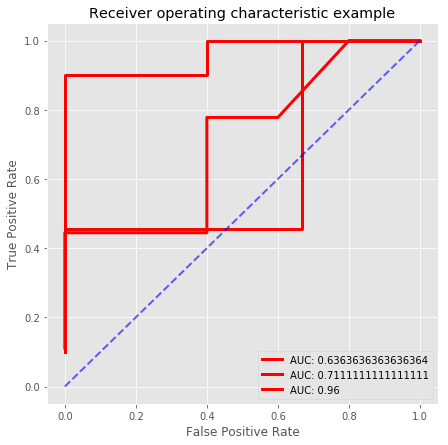

In [262]:
fig,ax=plt.subplots(1,figsize=(7,7))
for i in range(3):
    ax.plot(fpr[i],tpr[i],linewidth=3,color='r',label='AUC: '+str(roc_auc[i]))
ax.legend(prop={'size': 10})
ax.plot([0,1],[0,1], linewidth=2,alpha=0.6,color='b',linestyle='--')
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver operating characteristic example')

#### 多分类

In [152]:
diseasestatus = wholeannotab['Disease_status'][np.where(np.in1d(wholeannotab['Sample_ID'],
               featuretable['sampleID']))[0]]

In [263]:
diseasestatus = wholeannotation['Stage-BCLC'][np.where(np.in1d(wholeannotation['Sample_ID'],
               featuretable['sampleID']))[0]]
diseasestatus[diseasestatus=='-'] = 'control'

In [264]:
diseasestatus[diseasestatus =='A'] = 0 
diseasestatus[diseasestatus =='B'] = 1 
diseasestatus[diseasestatus =='C'] = 2
diseasestatus[diseasestatus =='control'] = 3

In [265]:
np.unique(diseasestatus,return_counts=True)

(array([0, 1, 2, 3], dtype=object), array([16, 10,  4, 13]))

In [266]:
y = label_binarize(np.array(diseasestatus).astype('int'), classes=[0,1,2,3])
n_classes = 4
X_train, X_test, y_train, y_test,y_score,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
for i in range(3):
    lasso.fit(featuresarray[trainind[i]], y[trainind[i]])
    features = featuresarray#[:,np.where(lasso.coef_!=0)[0]]
    X_train[i], X_test[i], y_train[i], y_test[i] =\
        features[trainind[i]], features[testind[i]], y[trainind[i]],y[testind[i]]
    #clf = OneVsRestClassifier(RandomForestClassifier(max_depth=2, random_state=0))
    #y_score[i] = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])
    clf = OneVsRestClassifier(LinearSVC(random_state=0))
    y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
    fpr[i] = dict()
    tpr[i] = dict()
    roc_auc[i] = dict()
    for j in range(n_classes):
        fpr[i][j], tpr[i][j], _ = roc_curve(y_test[i][:, j], y_score[i][:, j])
        roc_auc[i][j] = auc(fpr[i][j], tpr[i][j])

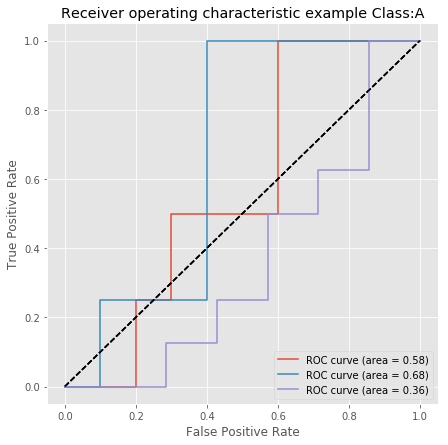

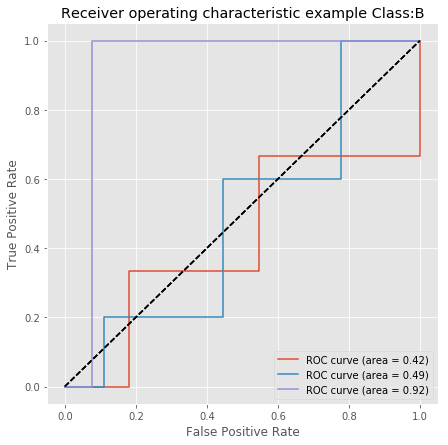

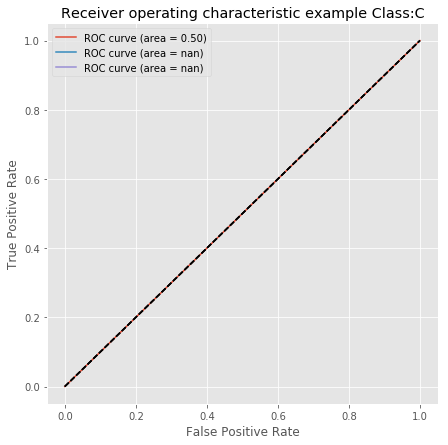

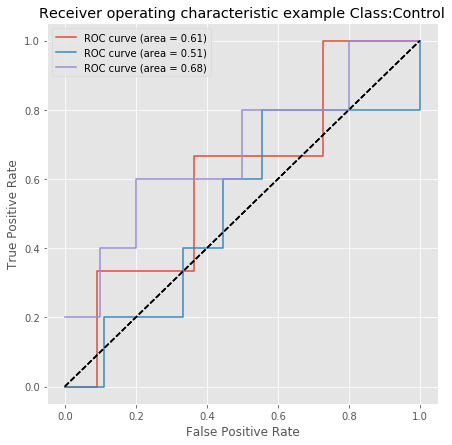

In [267]:
for j in range(4):  #classes
    fig,ax=plt.subplots(1,figsize=(7,7))
    for i in range(3):  #cv   
        
        ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example'+' Class:' +['A','B','C','Control'][j])
        ax.legend(prop={'size': 10})

### stage X vs control!

In [268]:
np.array(diseasestatus)

array([0, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 2, 1, 0, 1, 2,
       0, 1, 0, 0, 1, 2, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
      dtype=object)

In [269]:
trainind,testind={},{}
for t in range(3):
    trainind[t] = make_cv(3,twoclassind.shape[0])[0][t]
    testind[t] =make_cv(3,twoclassind.shape[0])[1][t]
lasso.fit(featuresarray[twoclassind][trainind[i]], y_[trainind[i]])

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [632]:
featuresarray.shape

(43, 23847)

In [628]:
#features = featuresarray
y = np.array(featuretable['lables'])
X_train, X_test, y_train, y_test,y_score,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
for j in range(3):
    twoclassind = np.concatenate((np.where(np.array(diseasestatus) ==3)[0],
                              np.where(np.array(diseasestatus) ==j)[0]))
    y_ = y[twoclassind]
    trainind,testind={},{}
    for t in range(3):
        trainind[t] = make_cv(3,twoclassind.shape[0])[0][t]
        testind[t] =make_cv(3,twoclassind.shape[0])[1][t]
    fpr[j] = dict()
    tpr[j] = dict()
    roc_auc[j] = dict()
    for i in range(3):
        lasso.fit(featuresarray[twoclassind][trainind[i]], y_[trainind[i]])
        features = featuresarray[twoclassind,:][:,np.where(lasso.coef_!=0)[0]]
        X_train[i], X_test[i], y_train[i], y_test[i] =\
            features[trainind[i]], features[testind[i]], y_[trainind[i]],y_[testind[i]]
        #clf = RandomForestClassifier(max_depth=5, random_state=0)
        #y_score[i] = clf.fit(X_train[i], y_train[i]).predict_proba(X_test[i])
        #fpr[j][i], tpr[j][i], _ = roc_curve(y_test[i], y_score[i][:,1])
        #clf = OneVsRestClassifier(LinearSVC(random_state=0))
        #y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
        
        clf = LogisticRegression()
        y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
        fpr[j][i], tpr[j][i], _ = roc_curve(y_test[i], y_score[i])
        roc_auc[j][i] = auc(fpr[j][i], tpr[j][i])
for j in range(3):  #classes
    fig,ax=plt.subplots(1,figsize=(7,7))
    for i in range(3):  #cv   
        
        ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example'+' Stage ' +['A','B','C'][j]+' vs Control')
        ax.legend(prop={'size': 10})

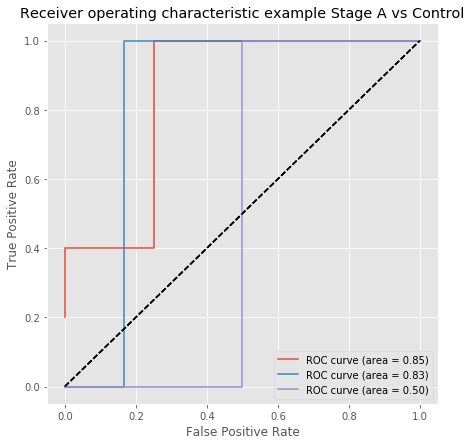

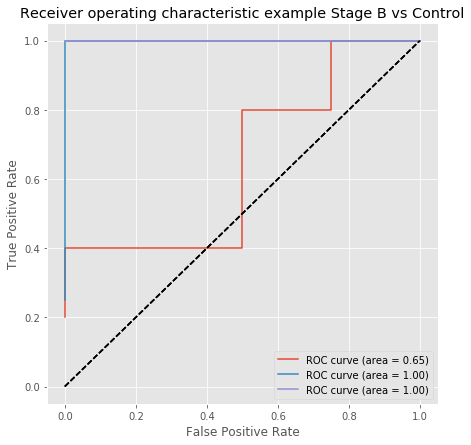

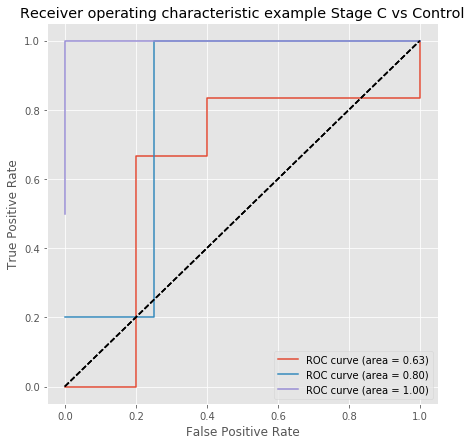

In [629]:
for j in range(3):  #classes
    fig,ax=plt.subplots(1,figsize=(7,7))
    for i in range(3):  #cv   
        
        ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
        ax.plot([0, 1], [0, 1], 'k--')
        ax.set_xlabel('False Positive Rate')
        ax.set_ylabel('True Positive Rate')
        ax.set_title('Receiver operating characteristic example'+' Stage ' +['A','B','C'][j]+' vs Control')
        ax.legend(prop={'size': 10})

### 测试七条miRNA

In [242]:
featuretable.columns

Index(['sampleID', 'lables', 'miRNA_ENSG00000278267.1',
       'miRNA_ENSG00000273874.1', 'miRNA_ENSG00000278791.1',
       'miRNA_ENSG00000207730.3', 'miRNA_ENSG00000207607.3',
       'miRNA_ENSG00000198976.1', 'miRNA_ENSG00000278073.1',
       'miRNA_ENSG00000283712.1',
       ...
       'mRNA_ENSG00000198712.1', 'mRNA_ENSG00000228253.1',
       'mRNA_ENSG00000198899.2', 'mRNA_ENSG00000198938.2',
       'mRNA_ENSG00000198840.2', 'mRNA_ENSG00000212907.2',
       'mRNA_ENSG00000198886.2', 'mRNA_ENSG00000198786.2',
       'mRNA_ENSG00000198695.2', 'mRNA_ENSG00000198727.2'],
      dtype='object', length=23829)

In [374]:
sevenmirna= np.array(["miRNA_ENSG00000284440.1", "miRNA_ENSG00000283926.1","snRNA_ENSG00000274978.1",
                     "miRNA_ENSG00000284190.1", "miRNA_ENSG00000284567.1", "miRNA_ENSG00000199075.1", "miRNA_ENSG00000207808.1"])

In [364]:
wholemx =pd.read_csv('/home/chenxupeng/projects/training/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx'
           ,sep='\t')

In [365]:
testindex = wholemx.index

In [375]:
np.where(np.isin(testindex,sevenmirna))

(array([   287,    937,   1428,   1493,   1531,   1798, 815026]),)

In [376]:
selectmirnafeature = np.array(wholemx.iloc[np.where(np.isin(testindex,sevenmirna))[0],:])


In [377]:
selectmirnafeature.shape

(7, 64)

In [613]:
#featuresarray = preprocessing.scale(selectmirnafeature[:,np.where(wholeannotation['use']==1)[0]]).T

In [379]:
from sklearn.linear_model import LogisticRegression

In [653]:
#features = featuresarray
def stage_control(featuresarray,y):
    X_train, X_test, y_train, y_test,y_score,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
    for j in range(3):
        twoclassind = np.concatenate((np.where(np.array(diseasestatus) ==3)[0],
                                  np.where(np.array(diseasestatus) ==j)[0]))
        y_ = y[twoclassind]
        trainind,testind={},{}
        for t in range(3):
            trainind[t] = make_cv(3,twoclassind.shape[0])[0][t]
            testind[t] =make_cv(3,twoclassind.shape[0])[1][t]
        fpr[j] = dict()
        tpr[j] = dict()
        roc_auc[j] = dict()
        for i in range(3):
            lasso.fit(featuresarray[twoclassind][trainind[i]], y_[trainind[i]])
            features = featuresarray[twoclassind,:][:,np.where(lasso.coef_!=0)[0]]
            X_train[i], X_test[i], y_train[i], y_test[i] =\
                features[trainind[i]], features[testind[i]], y_[trainind[i]],y_[testind[i]]
            clf = LogisticRegression()
            y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
            #clf = OneVsRestClassifier(LinearSVC(random_state=0))
            #y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])

            fpr[j][i], tpr[j][i], _ = roc_curve(y_test[i], y_score[i])
            roc_auc[j][i] = auc(fpr[j][i], tpr[j][i])
    for j in range(3):  #classes
        fig,ax=plt.subplots(1,figsize=(7,7))
        for i in range(3):  #cv   

            ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
            ax.plot([0, 1], [0, 1], 'k--')
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title('Receiver operating characteristic example'+' Stage ' +['A','B','C'][j]+' vs Control, Feature: seven miRNA')
            ax.legend(prop={'size': 10})
    
    display(pd.DataFrame(np.round([[roc_auc[j][i] for i in range(3)] for j in range(3)],3),
             columns=['StageA vs Control','StageB vs Control','StageC vs Control'],
            index=['cv1','cv2','cv3']))

,StageA vs Control,StageB vs Control,StageC vs Control
cv1,0.85,0.50,0.70
cv2,0.50,1.00,0.75
cv3,0.75,0.25,0.70


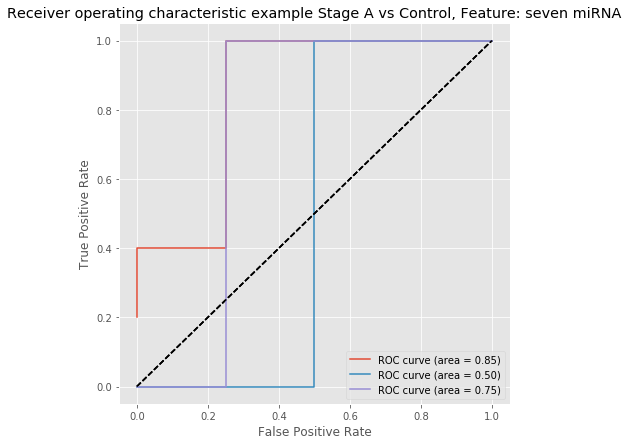

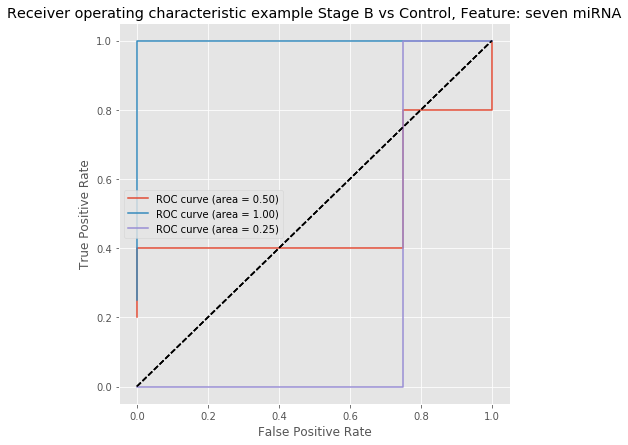

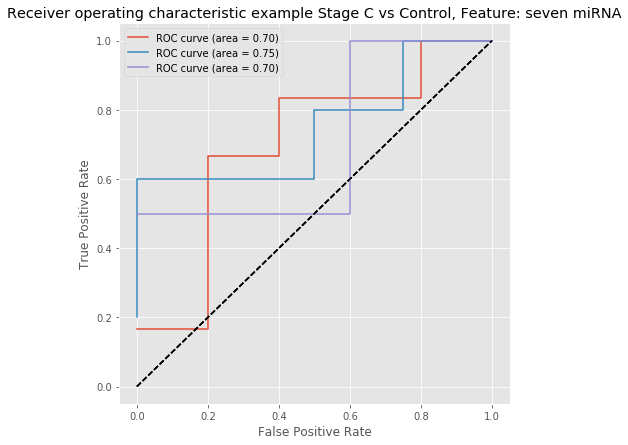

In [654]:
stage_control(preprocessing.scale(selectmirnafeature[:,np.where(wholeannotation['use']==1)[0]]).T
              ,np.array(featuretable['lables']))

#### 测试只有mRNA

In [637]:
featuresarray[:,np.where(np.array([featuretable.columns[2:][i].split('_')[0]
          for i in range(featuretable.columns[2:].shape[0])]) =='mRNA')[0]].shape

(43, 14498)

,StageA vs Control,StageB vs Control,StageC vs Control
cv1,0.600,0.650,0.50
cv2,0.333,0.833,0.65
cv3,0.500,1.000,0.70


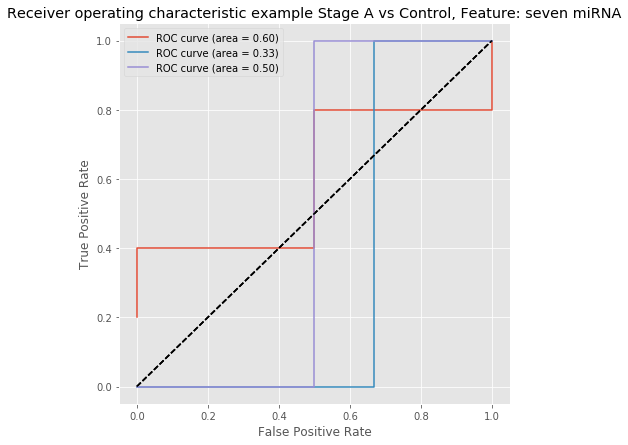

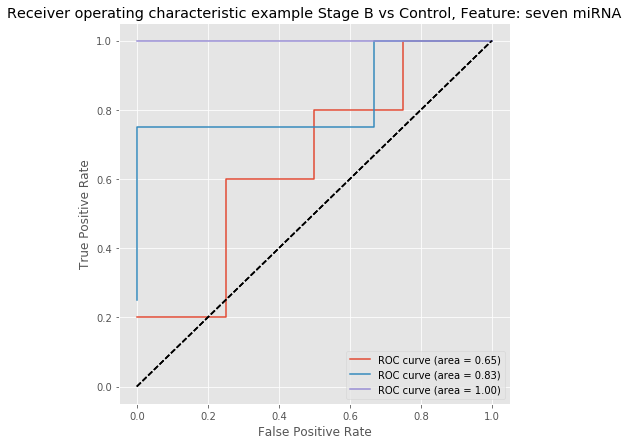

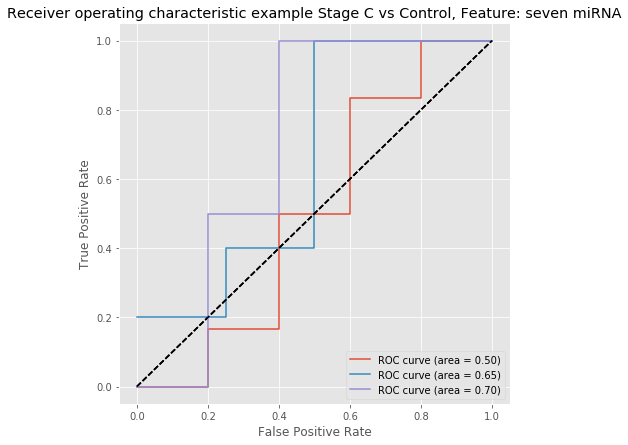

In [655]:
stage_control(featuresarray[:,np.where(np.array([featuretable.columns[2:][i].split('_')[0]
          for i in range(featuretable.columns[2:].shape[0])]) =='mRNA')[0]]
              ,np.array(featuretable['lables']))

,StageA vs Control,StageB vs Control,StageC vs Control
cv1,0.850,0.65,0.633
cv2,0.833,1.00,0.800
cv3,0.500,1.00,1.000


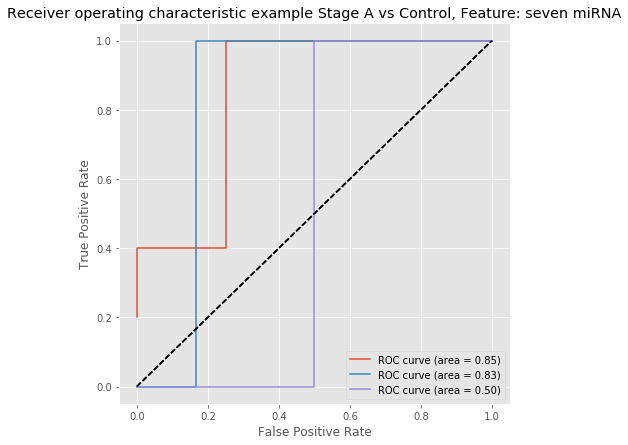

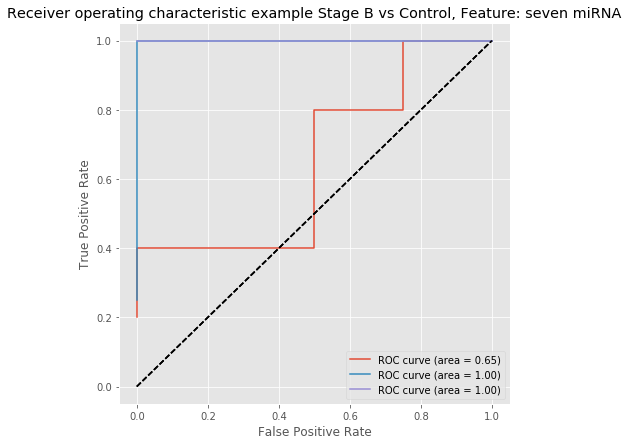

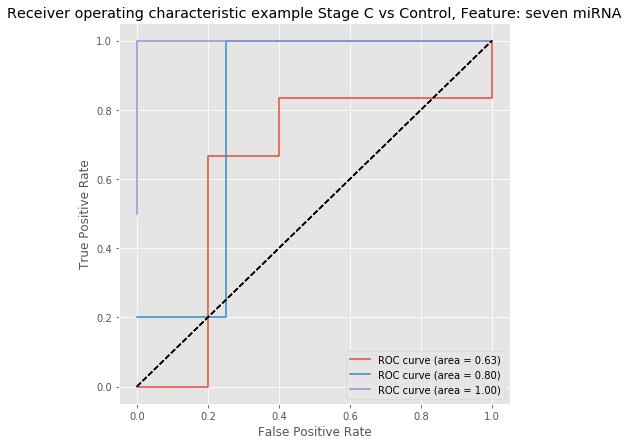

In [656]:
stage_control(featuresarray
              ,np.array(featuretable['lables']))

## 重复在binned做

### 步骤
- 得到normalized过的
- 加上top20 binned
- feature_select
- stage_vs control

### 先做anova再做imputation

In [778]:
binnedfeature = pd.read_table('05.matrix/forfeatureselectionbynorm_61samplebinned.csv',sep=',')
binnedsampled = np.loadtxt('05.matrix/binned.head.txt',dtype='str')

In [714]:
binnedsampled = np.loadtxt('05.matrix/binned.head.txt',dtype='str')

In [779]:
#不用
binnedfeaturename = np.loadtxt('05.matrix/binned.feature.txt',dtype='str')[1:]
binnedfeaturename = 0

array(['miRNA_ENSG00000278267.1__17369__17399',
       'miRNA_ENSG00000278267.1__17384__17414',
       'miRNA_ENSG00000278267.1__17399__17429', ...,
       'mRNA_ENSG00000124334.17_PAR_Y__57197281__571973',
       'mRNA_ENSG00000124334.17_PAR_Y__57197296__571973',
       'mRNA_ENSG00000124334.17_PAR_Y__57197326__571973'], dtype='<U47')

In [780]:
display(binnedfeature.head())
print (binnedfeature.shape)

,Unnamed: 0,sampleID,lables,miRNA_ENSG00000278267.1__17384__17414,miRNA_ENSG00000278267.1__17399__17429,miRNA_ENSG00000278267.1__17429__17436,miRNA_ENSG00000273874.1__187906__187936,miRNA_ENSG00000273874.1__187921__187951,miRNA_ENSG00000273874.1__187951__187958,miRNA_ENSG00000278791.1__632325__632355,...,mRNA_ENSG00000013563.13__154409598__154409628_3,mRNA_ENSG00000013563.13__154409598__154409628_4,mRNA_ENSG00000013563.13__154409613__154409643,mRNA_ENSG00000013563.13__154409613__154409643_2,mRNA_ENSG00000013563.13__154409613__154409643_3,mRNA_ENSG00000013563.13__154409613__154409643_4,mRNA_ENSG00000013563.13__154409628__154409658,mRNA_ENSG00000013563.13__154409628__154409658_2,mRNA_ENSG00000013563.13__154409628__154409658_3,mRNA_ENSG00000013563.13__154409628__154409658_4
0,lulab_249136_B,lulab_249136_B,1,2.199809,2.199809,2.199809,1.136232,1.136232,1.136232,1.763888,...,0.677198,0.677198,0.677198,0.677198,0.677198,0.677198,0.677198,0.677198,0.677198,0.677198
1,lulab_385247_B,lulab_385247_B,1,5.158344,4.979417,4.914479,4.914479,4.846480,4.846480,2.712364,...,3.222019,3.222019,3.222019,3.222019,3.222019,3.222019,3.222019,3.222019,3.222019,3.222019
2,lulab_423976_B,lulab_423976_B,1,1.718947,1.718947,1.718947,2.269013,2.269013,2.269013,2.830233,...,1.337981,1.337981,1.337981,1.337981,1.337981,1.337981,1.337981,1.337981,1.337981,1.337981
3,lulab_497411_B,lulab_497411_B,1,2.969976,2.474260,2.474260,3.717158,2.969976,2.969976,2.474260,...,3.225610,3.225610,3.225610,3.225610,3.225610,3.225610,3.225610,3.225610,3.225610,3.225610
4,lulab_497497_B,lulab_497497_B,1,4.423112,4.278562,4.278562,4.786020,4.786020,4.786020,5.523460,...,3.937076,3.937076,3.937076,3.937076,3.937076,3.937076,3.937076,3.937076,3.937076,3.937076


(61, 59495)


In [677]:
top203 = np.array(['Y_RNA_ENSG00000201778.1__157153548__157153578',
       'Y_RNA_ENSG00000201778.1__157153563__157153593',
       'Y_RNA_ENSG00000201778.1__157153578__157153608',
       'miRNA_ENSG00000284565.1__28861384__28861414',
       'miRNA_ENSG00000284565.1__28861399__28861429',
       'miRNA_ENSG00000284440.1__58451089__58451119',
       'miRNA_ENSG00000284440.1__58451074__58451104',
       'miRNA_ENSG00000284440.1__58451104__58451134',
       'miRNA_ENSG00000284190.1__59841281__59841311',
       'miRNA_ENSG00000284190.1__59841266__59841296',
       'miRNA_ENSG00000199179.3__62603701__62603731',
       'miRNA_ENSG00000199179.3__62603686__62603716',
       'miRNA_ENSG00000199085.3__25949934__25949964',
       'miRNA_ENSG00000199085.3__25949919__25949949',
       'miRNA_ENSG00000199075.1__37969419__37969449',
       'miRNA_ENSG00000199075.1__37969404__37969434',
       'miRNA_ENSG00000207789.1__57824639__57824669',
       'miRNA_ENSG00000207789.1__57824654__57824684',
       'miRNA_ENSG00000283450.1__41660459__41660489',
       'miRNA_ENSG00000283450.1__41660444__41660474'])

In [798]:
binnedtop20 = np.array(pd.read_table('05.matrix/binnedtop20.csv',sep=',').iloc[:,1:].iloc[:,sampleinduse])
binnedtop20name = np.array(pd.read_table('05.matrix/binnedtop20.csv',sep=',').index)

In [716]:
sampleinduse

array([ 3,  4,  6,  8,  9, 12, 13, 14, 16, 19, 20, 21, 22, 23, 24, 25, 27,
       28, 29, 36, 38, 40, 42, 43, 44, 45, 47, 48, 52, 53, 54, 55, 56, 57,
       58, 59, 60, 61, 62, 63])

In [717]:
binnedfeature.shape

(61, 59495)

In [782]:
binnedfeature = binnedfeature.iloc[sampleinduse,:]
binnedfeature.head()
featuresarray = np.array(binnedfeature.iloc[:,3:])
binnedfeature['lables'][binnedfeature['lables'] ==2]=0

In [727]:
top20binnedindex = np.where(np.isin(np.array(binnedfeature.index),top203))[0]

In [799]:
binnedtop20.shape

(20, 43)

### 不加top20了

In [800]:
print (preprocessing.scale(binnedtop20).shape)
print (preprocessing.scale(featuresarray).shape)
from  sklearn import preprocessing
featuresarray =np.concatenate((preprocessing.scale(featuresarray),
                               preprocessing.scale(binnedtop20).T,
                ),axis=1)
featuresarray.shape

(20, 43)
(43, 59492)


(43, 59512)

In [755]:
def feature_select(X,y,geneid,method):
    '''
    geneid  
    X y featuresarray, np.array(featuretable['lables'])
    X y mxlogged, np.array(featuretable['lables'])
    for processed data: featuretable.columns[2:]
    for raw data:  rawindex
    '''
    clf = linear_model.Lasso(alpha=0.0001)
    clf.fit(X, y)
    selectfeatureind = np.where(clf.coef_>=0.00001)[0]
    if method =='rfr':
        rfr = RandomForestClassifier(max_depth=2, random_state=0)
        rfr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        selectfeatureind_ =selectfeatureind[np.argsort(-rfr.feature_importances_)[:np.where(rfr.feature_importances_!=0)[0].shape[0]]]

        ttttesttab =pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_].reshape(-1,1),
                                    rfr.feature_importances_[np.argsort(-rfr.feature_importances_)
                                 [:np.where(rfr.feature_importances_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                    columns=['ID','importance'])
        countlist_ = []
        for i in range(15):
            countlist_.append(ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(8,4))
        ax.plot(np.array(ttttesttab.iloc[:,1]))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0]))
        ax.set_title('feature importance: '+method)
    if method =='lgr':
        lgr = LogisticRegression()
        lgr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        lgr.coef_ = lgr.coef_.ravel()
        selectfeatureind_ =selectfeatureind[np.argsort(-np.abs(lgr.coef_))[:np.where(lgr.coef_!=0)[0].shape[0]]]

        ttttesttab =  pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_-1].reshape(-1,1),
                                lgr.coef_[np.argsort(-np.abs(lgr.coef_))
                             [:np.where(lgr.coef_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                columns=['ID','importance'])
        countlist_ = []
        for i in range(100):
            countlist_.append(ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(10,5))
        ax.plot(np.abs(np.array(ttttesttab.iloc[:,1])))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0],5))
        ax.set_title('feature importance: '+method)

,0,1,2,3,4
0,miRNA_ENSG00000284118.1: 0.1216,piRNA_piR.hsa.26819: 0.0998,snoRNA_ENSG00000206688.1: 0.0962,snoRNA_ENSG00000207421.1: 0.0874,Y_RNA_ENSG00000252534.1: 0.0764
1,mRNA_ENSG00000167996.15: 0.0699,snoRNA_ENSG00000206688.1: 0.0684,mRNA_ENSG00000143458.11: 0.0628,piRNA_piR.hsa.6496: 0.0372,miRNA_ENSG00000278449.1: 0.0353
2,miRNA_ENSG00000207954.1: 0.0324,miRNA_ENSG00000221203.1: 0.0324,snoRNA_ENSG00000206688.1: 0.0323,miRNA_ENSG00000275950.1: 0.0316,piRNA_piR.hsa.24000: 0.0301


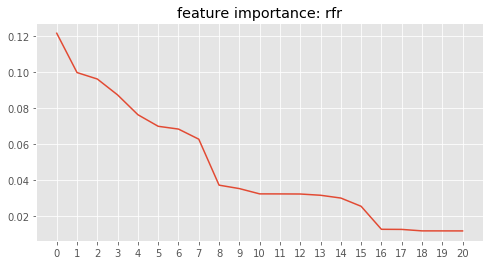

In [801]:
feature_select(featuresarray,np.array(featuretable['lables']),binnedfeature.columns[3:],\
               'rfr')

,0,1,2,3,4
0,mRNA_ENSG00000143458.11: 0.4488,mRNA_ENSG00000175093.4: 0.3994,miRNA_ENSG00000221203.1: -0.397,snoRNA_ENSG00000206688.1: 0.3928,mRNA_ENSG00000174564.12: 0.3914
1,snoRNA_ENSG00000206688.1: 0.3184,snoRNA_ENSG00000206688.1: 0.3116,snoRNA_ENSG00000206688.1: 0.3003,mRNA_ENSG00000167996.15: 0.2873,mRNA_ENSG00000134278.15: 0.2638
2,lncRNA_ENSG00000275450.1: 0.2636,lncRNA_ENSG00000275450.1: 0.2599,piRNA_piR.hsa.1710: 0.2543,lncRNA_ENSG00000273372.1: -0.2516,piRNA_piR.hsa.6496: 0.2455
3,snoRNA_ENSG00000281859.1: 0.2369,lncRNA_ENSG00000273372.1: -0.2368,miRNA_ENSG00000202569.4: -0.2328,lncRNA_ENSG00000280180.1: 0.2179,miRNA_ENSG00000211997.1: -0.2176
4,miRNA_ENSG00000199090.1: -0.2154,piRNA_piR.hsa.23679: 0.2068,miRNA_ENSG00000284329.1: -0.2034,piRNA_piR.hsa.20572_3700: -0.2023,lncRNA_ENSG00000258274.1: 0.2011
5,miRNA_ENSG00000207954.1: 0.2004,piRNA_piR.hsa.23621_8: 0.1993,miRNA_ENSG00000208002.1: 0.1972,srpRNA_ENSG00000264423.2: -0.1971,miRNA_ENSG00000284450.1: 0.1929
6,miRNA_ENSG00000221585.1: 0.1902,lncRNA_ENSG00000259104.2: 0.1893,miRNA_ENSG00000283813.1: -0.1841,miRNA_ENSG00000264119.1: -0.1828,mRNA_ENSG00000173812.10: -0.178
7,miRNA_ENSG00000266109.1: 0.1778,piRNA_piR.hsa.20572_3700: 0.1732,snRNA_ENSG00000199347.1: 0.1727,snRNA_ENSG00000199347.1: 0.1696,mRNA_ENSG00000173812.10: -0.1689
8,miRNA_ENSG00000283180.1: -0.1686,piRNA_piR.hsa.32798_5: 0.1684,miRNA_ENSG00000207730.3: 0.1641,miRNA_ENSG00000207807.1: 0.1619,mRNA_ENSG00000173812.10: -0.1576
9,miRNA_ENSG00000266643.1: -0.1562,lncRNA_ENSG00000275450.1: 0.1543,mRNA_ENSG00000173812.10: -0.1537,miRNA_ENSG00000264720.3: -0.1516,miRNA_ENSG00000283556.1: 0.1513


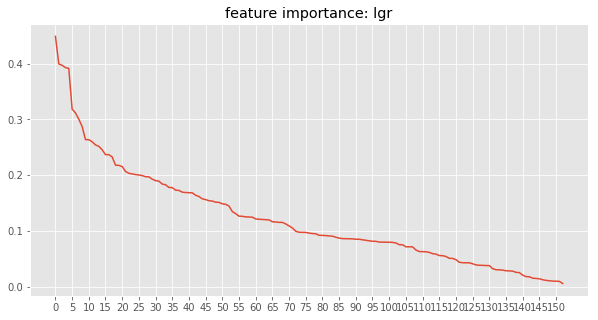

In [802]:
feature_select(featuresarray,np.array(featuretable['lables']),binnedfeature.columns[3:],\
               'lgr')

In [ ]:
#features = featuresarray
def stage_control(featuresarray,y):
    X_train, X_test, y_train, y_test,y_score,fpr, tpr,roc_auc = {},{},{},{},{},{},{},{}
    for j in range(3):
        twoclassind = np.concatenate((np.where(np.array(diseasestatus) ==3)[0],
                                  np.where(np.array(diseasestatus) ==j)[0]))
        y_ = y[twoclassind]
        trainind,testind={},{}
        for t in range(3):
            trainind[t] = make_cv(3,twoclassind.shape[0])[0][t]
            testind[t] =make_cv(3,twoclassind.shape[0])[1][t]
        fpr[j] = dict()
        tpr[j] = dict()
        roc_auc[j] = dict()
        for i in range(3):
            lasso.fit(featuresarray[twoclassind][trainind[i]], y_[trainind[i]])
            features = featuresarray[twoclassind,:][:,np.where(lasso.coef_!=0)[0]]
            X_train[i], X_test[i], y_train[i], y_test[i] =\
                features[trainind[i]], features[testind[i]], y_[trainind[i]],y_[testind[i]]
            clf = LogisticRegression()
            y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])
            #clf = OneVsRestClassifier(LinearSVC(random_state=0))
            #y_score[i] = clf.fit(X_train[i], y_train[i]).decision_function(X_test[i])

            fpr[j][i], tpr[j][i], _ = roc_curve(y_test[i], y_score[i])
            roc_auc[j][i] = auc(fpr[j][i], tpr[j][i])
    for j in range(3):  #classes
        fig,ax=plt.subplots(1,figsize=(7,7))
        for i in range(3):  #cv   

            ax.plot(fpr[i][j], tpr[i][j], label='ROC curve (area = %0.2f)' % roc_auc[i][j])
            ax.plot([0, 1], [0, 1], 'k--')
            ax.set_xlabel('False Positive Rate')
            ax.set_ylabel('True Positive Rate')
            ax.set_title('Receiver operating characteristic example'+' Stage ' +['A','B','C'][j]+' vs Control, Feature: seven miRNA')
            ax.legend(prop={'size': 10})
    
    display(pd.DataFrame(np.round([[roc_auc[j][i] for i in range(3)] for j in range(3)],3),
             columns=['StageA vs Control','StageB vs Control','StageC vs Control'],
            index=['cv1','cv2','cv3']))

In [758]:
featuresarray.shape

(43, 59492)

,StageA vs Control,StageB vs Control,StageC vs Control
cv1,1.00,1.000,1.0
cv2,1.00,0.917,1.0
cv3,0.75,1.000,0.9


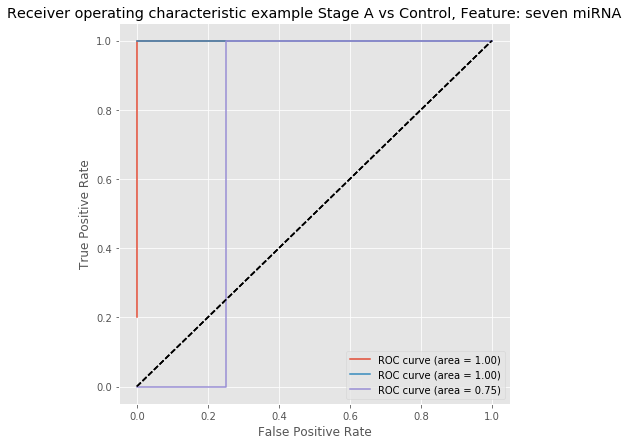

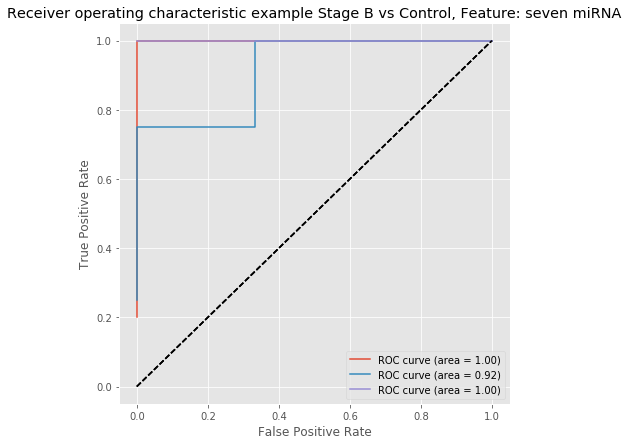

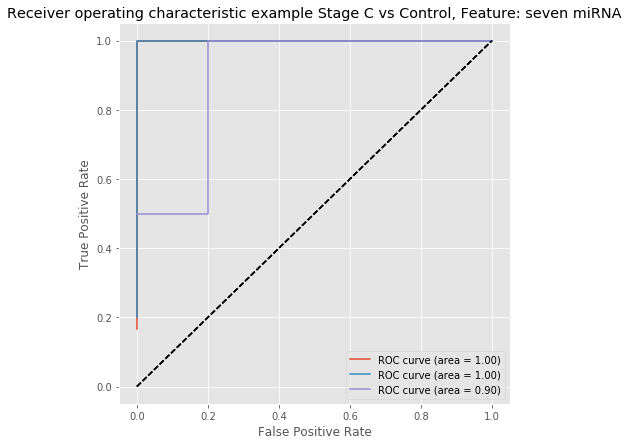

In [757]:
stage_control(featuresarray
              ,np.array(featuretable['lables']))

## mx feature
写成函数调两种feature和feature table 
然后拼在一起


In [808]:
featuretable = pd.read_table("05.matrix/forfeatureselectionbynorm_61sample.csv",sep=',').iloc[:,1:]
sampleinduse = np.where(np.isin(np.array(featuretable['sampleID']),wholeannotation['Sample_ID'][np.where(wholeannotation['use']==1)[0]]
                ))[0]

In [819]:
fullfeatures = pd.read_table("/Share/home/caojingyi/exRNA/process/18.new_hcc_lulab/05.matrix/hcc_lulab.sequentialMap.featureCounts.merged.mx")

In [820]:
def get_feature(featuretable,method='full'):
    if method =='full':
        featuretable = featuretable.iloc[sampleinduse,:]
        featuresarray = np.array(featuretable.iloc[:,2:])
        featuretable['lables'][featuretable['lables'] ==2]=0
        featuresarray =np.concatenate((preprocessing.scale(featuresarray),
                               preprocessing.scale(fullfeatures.iloc[top20fullindex,sampleinduse]).T,
                ),axis=1)
        return featuresarray,np.array(featuretable['lables']),np.concatenate((featuretable.columns[2:],fulltop20))
    elif method=='bin':
        binnedfeature = pd.read_table('05.matrix/forfeatureselectionbynorm_61samplebinned.csv',sep=',')
        binnedsampled = np.loadtxt('05.matrix/binned.head.txt',dtype='str')
        binnedfeature = binnedfeature.iloc[sampleinduse,:]

        featuresarray = np.array(binnedfeature.iloc[:,3:])
        binnedfeature['lables'][binnedfeature['lables'] ==2]=0
        binnedtop20 = np.array(pd.read_table('05.matrix/binnedtop20.csv',sep=',').iloc[:,1:].iloc[:,sampleinduse])
        binnedtop20name = np.array(pd.read_table('05.matrix/binnedtop20.csv',sep=',').index)
        featuresarray =np.concatenate((preprocessing.scale(featuresarray),
                               preprocessing.scale(binnedtop20).T,
                ),axis=1)
        return featuresarray,np.array(featuretable['lables']),np.concatenate((binnedfeature.columns[3:],binnedtop20name))

In [821]:
fullfeature,labels,fullfeaturename = get_feature(featuretable,method='full')
binnedfeature,labels,binnedfeaturename = get_feature(featuretable,method='bin')

In [833]:
print (fullfeature.shape,labels.shape,fullfeaturename.shape)
print (binnedfeature.shape,labels.shape,binnedfeaturename.shape)

(43, 23847) (61,) (23847,)
(43, 59512) (61,) (59512,)


In [828]:
mxfeature,mxfeaturename = np.concatenate((fullfeature,binnedfeature),1),\
                    np.concatenate((fullfeaturename,binnedfeaturename))

In [856]:
np.isin(2,np.where(selectfeatureind_>=1000)[0])

array(False)

In [872]:
def feature_select(X,y,geneid,method):
    '''
    geneid  
    X y featuresarray, np.array(featuretable['lables'])
    X y mxlogged, np.array(featuretable['lables'])
    for processed data: featuretable.columns[2:]
    for raw data:  rawindex
    '''
    clf = linear_model.Lasso(alpha=0.0001)
    clf.fit(X, y)
    selectfeatureind = np.where(clf.coef_>=0.00001)[0]
    if method =='rfr':
        rfr = RandomForestClassifier(max_depth=2, random_state=0)
        rfr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        selectfeatureind_ =selectfeatureind[np.argsort(-rfr.feature_importances_)[:np.where(rfr.feature_importances_!=0)[0].shape[0]]]

        ttttesttab =pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_].reshape(-1,1),
                                    rfr.feature_importances_[np.argsort(-rfr.feature_importances_)
                                 [:np.where(rfr.feature_importances_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                    columns=['ID','importance'])
        countlist_ = []
        binnedfeatureindinit = np.where(selectfeatureind_>=23847)[0]
        for i in range(15):
            if np.isin(i , binnedfeatureindinit):
                countlist_.append('binned: '+ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
            else:
                countlist_.append(ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(8,4))
        ax.plot(np.array(ttttesttab.iloc[:,1]))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0]))
        ax.set_title('feature importance: '+method)
        return selectfeatureind_,binnedfeatureindinit
    if method =='lgr':
        lgr = LogisticRegression()
        lgr.fit(X[:,np.where(clf.coef_>=0.00001)[0]], y)
        lgr.coef_ = lgr.coef_.ravel()
        selectfeatureind_ =selectfeatureind[np.argsort(-np.abs(lgr.coef_))[:np.where(lgr.coef_!=0)[0].shape[0]]]

        ttttesttab =  pd.DataFrame(np.concatenate((np.array(geneid)[selectfeatureind_-1].reshape(-1,1),
                                lgr.coef_[np.argsort(-np.abs(lgr.coef_))
                             [:np.where(lgr.coef_!=0)[0].shape[0]]].reshape(-1,1)),axis=1),
                columns=['ID','importance'])
        countlist_ = []
        binnedfeatureindinit = np.where(selectfeatureind_>=23847)[0]
        print (selectfeatureind_.shape)
        for i in range(60):
            if np.isin(i , binnedfeatureindinit):
                countlist_.append('binned: '+ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
            else:
                countlist_.append(ttttesttab.iloc[i,0].split('__')[0]+': '+str(np.round(ttttesttab.iloc[i,1],4)))
        display(pd.DataFrame(np.array(countlist_).reshape(-1,5)))
        fig,ax=plt.subplots(1,figsize=(10,5))
        ax.plot(np.abs(np.array(ttttesttab.iloc[:,1])))
        ax.set_xticks(np.arange(0,ttttesttab.shape[0],5))
        ax.set_title('feature importance: '+method)
        return selectfeatureind_,binnedfeatureindinit

,0,1,2,3,4
0,lncRNA_ENSG00000281591.1: 0.1663,binned: snoRNA_ENSG00000201025.1: 0.0961,miRNA_ENSG00000263468.1: 0.0893,binned: snoRNA_ENSG00000201025.1: 0.0873,miRNA_ENSG00000283469.1: 0.0725
1,miRNA_ENSG00000281426.1: 0.07,miRNA_ENSG00000266006.1: 0.0678,lncRNA_ENSG00000269968.1: 0.0509,piRNA_piR.hsa.23387_88774: 0.0498,miRNA_ENSG00000263381.1: 0.0491
2,miRNA_ENSG00000264539.1: 0.0453,miRNA_ENSG00000275652.1: 0.0441,piRNA_piR.hsa.13252_9: 0.0383,lncRNA_ENSG00000225226.1: 0.0381,piRNA_piR.hsa.16257: 0.02


(array([ 5451, 34320,   160, 34318,   159,   199,   559,  6966,  1791,
          39,   674,   966,  1502,  4712,  1276,  1194]), array([1, 3]))


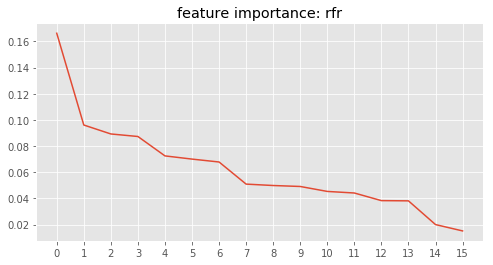

In [861]:
print (feature_select(mxfeature,labels[sampleinduse],mxfeaturename,\
               'rfr'))

(64,)


,0,1,2,3,4
0,binned: snoRNA_ENSG00000201025.1: 0.7664,miRNA_ENSG00000273874.1: 0.5845,binned: snoRNA_ENSG00000212304.1: 0.5725,lncRNA_ENSG00000255966.1: 0.5283,miRNA_ENSG00000264583.1: 0.5084
1,piRNA_piR.hsa.22419_3324: 0.4949,miRNA_ENSG00000266063.1: 0.3801,miRNA_ENSG00000283469.1: 0.3144,miRNA_ENSG00000207631.1: 0.2991,miRNA_ENSG00000198987.1: 0.2924
2,Y_RNA_ENSG00000201363.2: 0.2907,piRNA_piR.hsa.18657_6555: 0.2866,miRNA_ENSG00000207926.1: 0.2791,piRNA_piR.hsa.21148_65: 0.2554,mRNA_ENSG00000167904.14: 0.2546
3,lncRNA_ENSG00000260763.1: 0.2441,mRNA_ENSG00000171634.16: 0.2437,lncRNA_ENSG00000237798.1: 0.2305,lncRNA_ENSG00000254209.1: 0.2274,miRNA_ENSG00000221650.1: 0.2267
4,miRNA_ENSG00000275344.1: 0.2233,lncRNA_ENSG00000247796.2: 0.2063,miRNA_ENSG00000207627.1: 0.2023,miRNA_ENSG00000274975.1: 0.201,mRNA_ENSG00000179314.13: 0.1841
5,piRNA_piR.hsa.25520: 0.1835,piRNA_piR.hsa.23387_52533: 0.1831,piRNA_piR.hsa.10453_15: 0.1808,lncRNA_ENSG00000279616.1: 0.1673,lncRNA_ENSG00000233251.7: 0.1641
6,lncRNA_ENSG00000245685.6: 0.1624,snoRNA_ENSG00000199851.2: 0.1608,piRNA_piR.hsa.1745_181: 0.1548,miRNA_ENSG00000278598.1: 0.1446,miRNA_ENSG00000238705.1: 0.1444
7,srpRNA_ENSG00000264271.2: -0.1436,lncRNA_ENSG00000283907.1: 0.1432,miRNA_ENSG00000264725.1: 0.1419,miRNA_ENSG00000199053.3: 0.1376,snRNA_ENSG00000207083.1: 0.1336
8,mRNA_ENSG00000169435.13: 0.1304,snoRNA_ENSG00000200492.2: -0.1289,snRNA_ENSG00000238446.1: -0.1273,piRNA_piR.hsa.27725_2: 0.1231,piRNA_piR.hsa.28593: 0.1207
9,piRNA_piR.hsa.4047_2: 0.1105,mRNA_ENSG00000211445.11: 0.1101,lncRNA_ENSG00000254153.1: 0.1058,mRNA_ENSG00000244414.6: -0.1008,miRNA_ENSG00000283836.1: -0.0966


(array([34320,     2, 34318,  6966,   555,  1794,   137,   160,   966,
          218,  2349,  1791,   199,  1783, 15549,  5465, 21077,  4873,
         6315,   674,   559,  5521,   272,    39, 20498,  1421,  1496,
         1482,  5804,  4712,  5451,  2807,  1213,   840,    29,  3141,
         8738,   159,   851,  2634, 12878,  2817,  2564,  1502,  1194,
         1276, 13741,  6128, 10522,    38,  6256,  1458,  6733,  4949,
         3212,  1026,    12, 12059,  3337,   384,  6095,   446,   101,
         1218]), array([0, 2]))

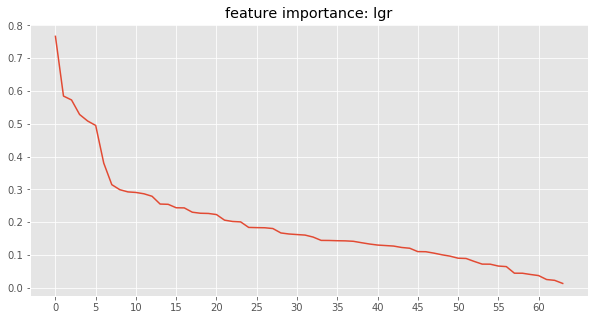

In [873]:
feature_select(mxfeature,labels[sampleinduse],mxfeaturename,\
               'lgr')

In [ ]:
mxfeature,mxfeaturename = np.concatenate((fullfeature,binnedfeature),1),\
                    np.concatenate((fullfeaturename,binnedfeaturename))

In [880]:
labels[sampleinduse][labels[sampleinduse] ==2] =0

In [882]:
labelsforclassification = np.zeros(43)
labelsforclassification[np.where(labels[sampleinduse]==2)] =1

,StageA vs Control,StageB vs Control,StageC vs Control
cv1,0.7,0.750,0.533
cv2,1.0,0.917,0.750
cv3,0.5,1.000,1.000


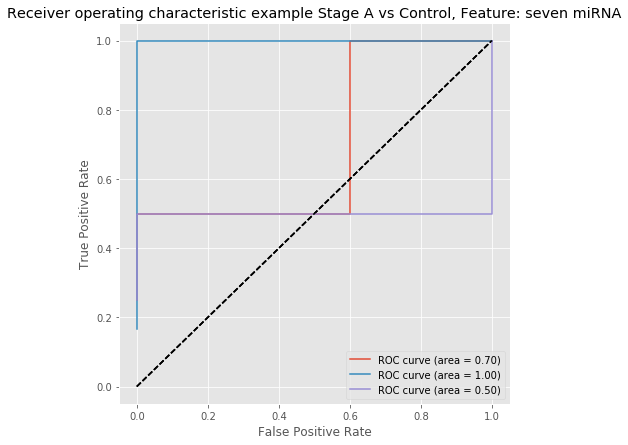

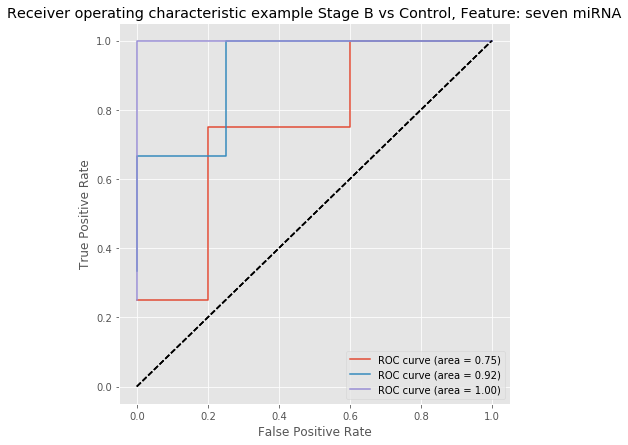

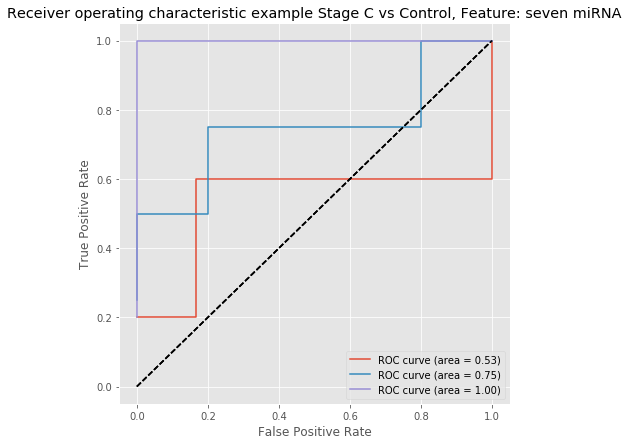

In [883]:
stage_control(mxfeature,labelsforclassification)

In [891]:
forbinnedmx = pd.read_csv('05.matrix/readstop20forbinned.csv')

In [888]:
np.array(top20)

array([841330, 841331, 841332,   3494,   3496,   4024,   4022,   4026,
         3716,   3715,   1725,   1724,   7368,   7367,   5924,   5923,
         1715,   1716,   7874,   7872])

In [894]:
forbinnedmx.head()

,Unnamed: 0,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,...,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
0,miRNA_ENSG00000207789.1__57824639__57824669,332280,594941,142852,273318,360813,300941,106732,564968,685476,...,907259,813992,1037538,1296421,1294721,175930,1227444,950015,1365061,1089226
1,miRNA_ENSG00000207789.1__57824654__57824684,332150,594747,142714,273093,360597,300835,106583,564852,685350,...,907118,813767,1037436,1296257,1294555,175636,1227236,949903,1364942,1089116
2,miRNA_ENSG00000199179.3__62603686__62603716,274001,1609280,247774,860746,567880,355662,401579,450387,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
3,miRNA_ENSG00000199179.3__62603701__62603731,274001,1609280,247774,860746,567880,355662,401579,450389,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
4,miRNA_ENSG00000284565.1__28861384__28861414,1059688,13328852,2931291,8780033,8353995,2446889,10001058,1778013,5908185,...,3585767,5307021,1001046,1460690,1180908,14094592,4442803,3062314,1184290,3278364


In [904]:
np.sum(np.array(forbinnedmx)[:,1:],axis=0).min()

1325426

In [912]:
forbinnedmx

,Unnamed: 0,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,...,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
0,miRNA_ENSG00000207789.1__57824639__57824669,332280,594941,142852,273318,360813,300941,106732,564968,685476,...,907259,813992,1037538,1296421,1294721,175930,1227444,950015,1365061,1089226
1,miRNA_ENSG00000207789.1__57824654__57824684,332150,594747,142714,273093,360597,300835,106583,564852,685350,...,907118,813767,1037436,1296257,1294555,175636,1227236,949903,1364942,1089116
2,miRNA_ENSG00000199179.3__62603686__62603716,274001,1609280,247774,860746,567880,355662,401579,450387,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
3,miRNA_ENSG00000199179.3__62603701__62603731,274001,1609280,247774,860746,567880,355662,401579,450389,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
4,miRNA_ENSG00000284565.1__28861384__28861414,1059688,13328852,2931291,8780033,8353995,2446889,10001058,1778013,5908185,...,3585767,5307021,1001046,1460690,1180908,14094592,4442803,3062314,1184290,3278364
5,miRNA_ENSG00000284565.1__28861399__28861429,1059627,13327510,2931147,8779351,8353704,2446748,10000638,1777899,5907796,...,3585625,5306772,1001006,1460598,1180840,14094152,4442552,3062183,1184200,3278268
6,miRNA_ENSG00000284190.1__59841266__59841296,873250,1099922,429900,897582,423701,377801,400817,458606,699791,...,682701,716085,900960,1175765,1149952,1681317,1419005,891959,780774,887337
7,miRNA_ENSG00000284190.1__59841281__59841311,873934,1101244,430120,898288,424063,378114,401025,458941,700244,...,683252,716741,901771,1176621,1151249,1681917,1419676,892312,781151,887672
8,miRNA_ENSG00000284440.1__58451074__58451104,3496395,207688,8286277,1205489,250720,801604,836722,205831,1229546,...,21479,30583,14190,29212,7733,1687700,1109297,1276306,246394,856350
9,miRNA_ENSG00000284440.1__58451089__58451119,3496395,207688,8286277,1205489,250720,801604,836722,205831,1229546,...,21479,30583,14190,29212,7733,1687700,1109297,1276306,246394,856350


In [895]:
forbinnedmxsum = np.sum(pd.read_csv('05.matrix/readsbincolsum.csv'))

(array([ 2.,  3.,  4.,  6., 13., 14., 14.,  2.,  1.,  2.]),
 array([2.07782500e+07, 3.74932072e+07, 5.42081644e+07, 7.09231216e+07,
        8.76380788e+07, 1.04353036e+08, 1.21067993e+08, 1.37782950e+08,
        1.54497908e+08, 1.71212865e+08, 1.87927822e+08]),
 <a list of 10 Patch objects>)

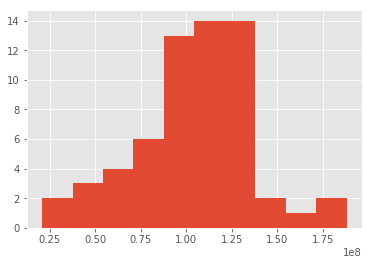

In [942]:
plt.hist(pd.read_csv('05.matrix/readsbincolsum.csv')['x'])

In [896]:
#6341166554

Unnamed: 0    lulab_249136_Blulab_385247_Blulab_423976_Blula...
x                                                    6341166554
dtype: object

In [948]:
forbinnedmx.head()

,Unnamed: 0,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,...,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
0,miRNA_ENSG00000207789.1__57824639__57824669,332280,594941,142852,273318,360813,300941,106732,564968,685476,...,907259,813992,1037538,1296421,1294721,175930,1227444,950015,1365061,1089226
1,miRNA_ENSG00000207789.1__57824654__57824684,332150,594747,142714,273093,360597,300835,106583,564852,685350,...,907118,813767,1037436,1296257,1294555,175636,1227236,949903,1364942,1089116
2,miRNA_ENSG00000199179.3__62603686__62603716,274001,1609280,247774,860746,567880,355662,401579,450387,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
3,miRNA_ENSG00000199179.3__62603701__62603731,274001,1609280,247774,860746,567880,355662,401579,450389,855309,...,649979,835107,571944,802143,789412,722910,959562,703343,760676,732278
4,miRNA_ENSG00000284565.1__28861384__28861414,1059688,13328852,2931291,8780033,8353995,2446889,10001058,1778013,5908185,...,3585767,5307021,1001046,1460690,1180908,14094592,4442803,3062314,1184290,3278364


In [949]:
np.sum(np.array(forbinnedmx.iloc[:,1:]))

3997323602

In [950]:
3997323602/6341166554

0.6303766929885312

In [954]:
(6341166554-3997323602)/610000

3842.3654950819673

In [955]:
np.repeat(10000,61*3842).reshape(-1,61).shape

(3842, 61)

In [961]:
forbinnedmx.columns

Index(['Unnamed: 0', 'lulab_249136_B', 'lulab_385247_B', 'lulab_423976_B',
       'lulab_497411_B', 'lulab_497497_B', 'lulab_498127_B', 'lulab_498187_B',
       'lulab_498221_B', 'lulab_507450_B', 'lulab_507468_B', 'lulab_507511_B',
       'lulab_507599_B', 'lulab_507867_B', 'lulab_507887_B', 'lulab_507909_B',
       'lulab_508877_B', 'lulab_508897_B', 'lulab_511030_B', 'lulab_511485_B',
       'lulab_515058_B', 'lulab_515292_B', 'lulab_SH325716_B',
       'lulab_SH327409_B', 'lulab_SH327412_B', 'lulab_SH327428_B',
       'lulab_17402567_B', 'lulab_3497470_B', 'lulab_5474594_B',
       'lulab_6474170_B', 'lulab_8397116_B', 'lulab_LY', 'lulab_CXD',
       'lulab_Normal_1', 'lulab_Normal_2', 'lulab_Normal_3', 'lulab_Normal_4',
       'lulab_Normal_5', 'lulab_Normal_6', 'lulab_Normal_7', 'lulab_Normal_8',
       'lulab_498187_A', 'lulab_498221_A', 'lulab_385247_A', 'lulab_498191_A',
       'lulab_510199_A', 'lulab_333874_A', 'lulab_482592_A', 'lulab_486978_A',
       'lulab_508955_A', 'lu

In [966]:
fakearr = np.concatenate((np.arange(0,3842).reshape(-1,1),np.repeat(10000,61*3842).reshape(-1,61)),axis=1)

In [967]:
fakearr.shape

(3842, 62)

In [977]:
fakedata = pd.DataFrame(fakearr,columns=forbinnedmx.columns)

In [969]:
fakedata.head()

,Unnamed: 0,lulab_249136_B,lulab_385247_B,lulab_423976_B,lulab_497411_B,lulab_497497_B,lulab_498127_B,lulab_498187_B,lulab_498221_B,lulab_507450_B,...,lulab_509970_A,lulab_510470_A,lulab_515058_A,lulab_515292_A,lulab_10515058_A,lulab_12402567_A,lulab_13515292_A,lulab_HBV_1,lulab_HBV_2,lulab_HBV_3
0,0,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
1,1,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
2,2,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
3,3,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000
4,4,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,10000


In [972]:
fakeall = pd.concat((forbinnedmx,fakedata))

In [979]:
fakedata['Unnamed: 0'].shape

(3842,)

In [980]:
fakeall.index.shape

(3862,)

In [978]:
fakeall.index = fakedata['Unnamed: 0']

ValueError: Length mismatch: Expected axis has 3862 elements, new values have 3842 elements

In [973]:
fakeall.to_csv('05.matrix/fakeall.csv')

In [915]:
#full binned mx mirna mrna
roctable = np.array([[0.85,0.65,0.633],[0.833,1.00,0.80],[0.500,1.00,1.000],
    [1.00,1.00,1.00],[1.00,0.917,1.00],[0.75,1.00,0.9],
         [0.70,0.75,0.533],[1.0,0.917,0.75],[0.5,1.00,1.00],
          [0.85,0.50,0.70],[0.5,1.00,0.75],[0.75,0.25,0.7]])

,cv
0,cv1
1,cv2
2,cv3
3,cv1
4,cv2
5,cv3
6,cv1
7,cv2
8,cv3
9,cv1


In [930]:
pd.concat((pd.DataFrame(np.repeat(['cv1','cv2','cv3'],4).reshape(-1,4).T.ravel(),columns=['cv']),pd.DataFrame(roctable,
             columns=['StageA vs Control','StageB vs Control','StageC vs Control'],
            index=['full','','','binned','','','mixed','','','miRNA','',''])),axis=1)

ValueError: Shape of passed values is (4, 80), indices imply (4, 24)

In [932]:
tableroc = pd.DataFrame(roctable,
             columns=['StageA vs Control','StageB vs Control','StageC vs Control'],
            index=['full','','','binned','','','mixed','','','miRNA','',''])

In [937]:
tableroc['cv'] = np.repeat(['cv1','cv2','cv3'],4).reshape(-1,4).T.ravel()

In [938]:
tableroc

,StageA vs Control,StageB vs Control,StageC vs Control,cv
full,0.850,0.650,0.633,cv1
,0.833,1.000,0.800,cv2
,0.500,1.000,1.000,cv3
binned,1.000,1.000,1.000,cv1
,1.000,0.917,1.000,cv2
,0.750,1.000,0.900,cv3
mixed,0.700,0.750,0.533,cv1
,1.000,0.917,0.750,cv2
,0.500,1.000,1.000,cv3
miRNA,0.850,0.500,0.700,cv1
